# California Housing Price Regression

## Load Dataset

In [1]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [2]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [3]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
housing.data.shape

(20640, 8)

In [5]:
housing.data[:5]

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])

## Split Dataset into Train and Test

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, random_state=42)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (15480, 8)
y_train shape:  (15480,)
X_test shape:  (5160, 8)
y_test shape:  (5160,)


## Train and Evaluate Model

## Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

print("Training set score: {:.2f}".format(linear_model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(linear_model.score(X_test, y_test)))

Training set score: 0.61
Test set score: 0.59


## Ridge Regression

In [8]:
from sklearn.linear_model import Ridge

ridge_model01 = Ridge(alpha=0.1)
ridge_model01.fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge_model01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge_model01.score(X_test, y_test)))

Training set score: 0.61
Test set score: 0.59


In [9]:
ridge_model1 = Ridge(alpha=1)
ridge_model1.fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge_model1.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge_model1.score(X_test, y_test)))

Training set score: 0.61
Test set score: 0.59


In [10]:
ridge_model10 = Ridge(alpha=10)
ridge_model10.fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge_model10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge_model10.score(X_test, y_test)))

Training set score: 0.61
Test set score: 0.59


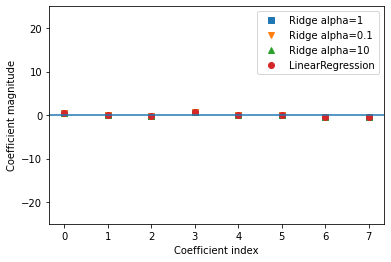

In [11]:
from matplotlib import pyplot as plt

plt.plot(ridge_model1.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge_model01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(ridge_model10.coef_, '^', label="Ridge alpha=10")
plt.plot(linear_model.coef_, 'o', label="LinearRegression")

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

## Lasso Regression

In [12]:
import numpy as np
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso_model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso_model.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso_model.coef_ != 0)))

Training set score: 0.29
Test set score: 0.29
Number of features used: 3


In [13]:
lasso_model001 = Lasso(alpha=0.01, max_iter=100000)
lasso_model001.fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso_model001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso_model001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso_model001.coef_ != 0)))

Training set score: 0.61
Test set score: 0.60
Number of features used: 8


In [14]:
lasso_model00001 = Lasso(alpha=0.0001, max_iter=100000)
lasso_model00001.fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso_model00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso_model00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso_model00001.coef_ != 0)))

Training set score: 0.61
Test set score: 0.59
Number of features used: 8


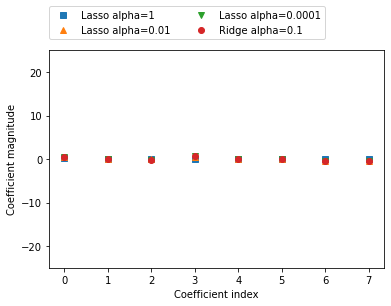

In [15]:
from matplotlib import pyplot as plt

plt.plot(lasso_model.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso_model001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso_model00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge_model01.coef_, 'o', label="Ridge alpha=0.1")

plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend(ncol=2, loc=(0, 1.05))